In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the label CSV (adjust as necessary)
labels_path = '../data/fairface_label_train.csv'

# Load labels
df = pd.read_csv(labels_path)

# Display the first few rows
print(df.head())


          file    age  gender        race  service_test
0  train/1.jpg  50-59    Male  East Asian          True
1  train/2.jpg  30-39  Female      Indian         False
2  train/3.jpg    3-9  Female       Black         False
3  train/4.jpg  20-29  Female      Indian          True
4  train/5.jpg  20-29  Female      Indian          True


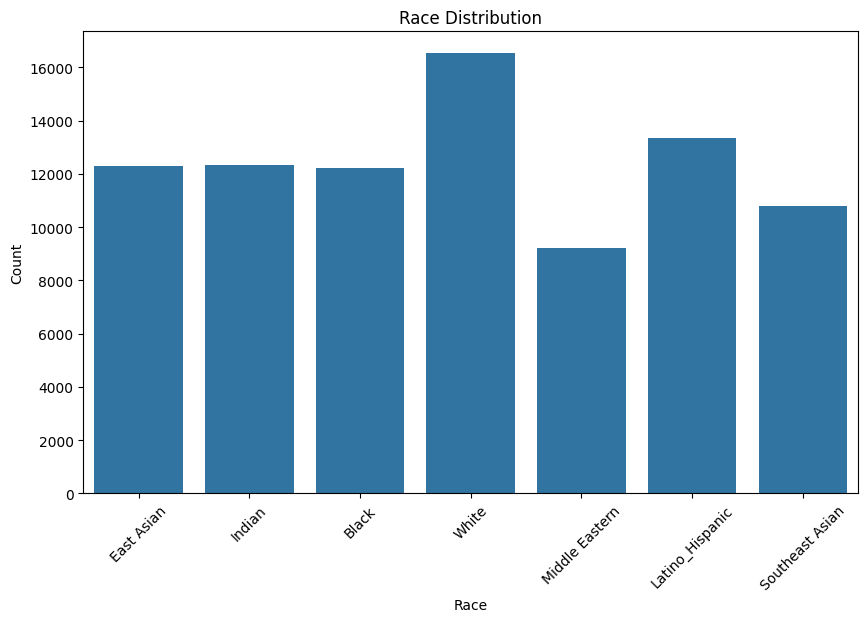

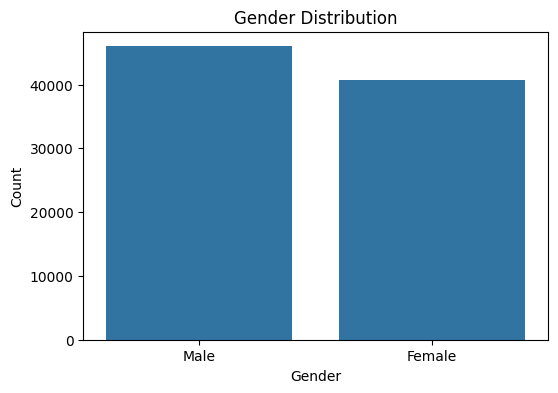

In [2]:
# Race Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='race')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Trying to read: ../data/fairface/train/1021.jpg
Trying to read: ../data/fairface/train/8414.jpg
Trying to read: ../data/fairface/train/30059.jpg


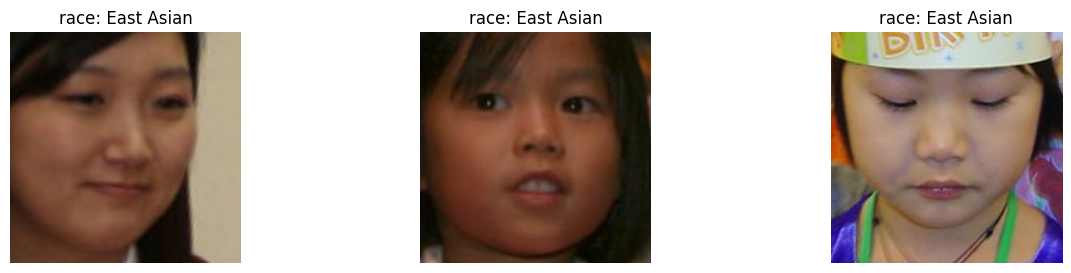

Trying to read: ../data/fairface/train/43481.jpg
Trying to read: ../data/fairface/train/1506.jpg
Trying to read: ../data/fairface/train/51419.jpg


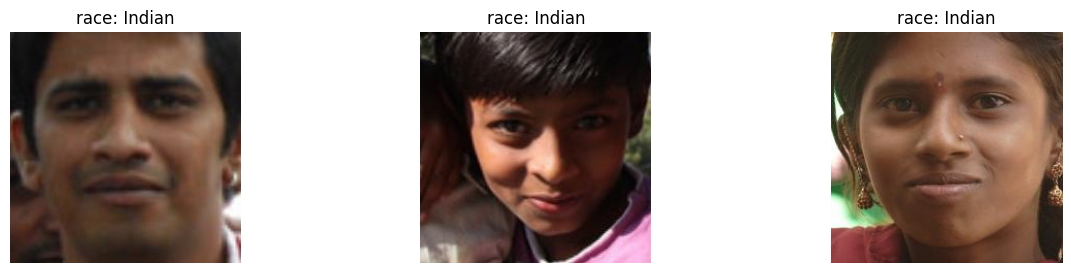

Trying to read: ../data/fairface/train/75177.jpg
Trying to read: ../data/fairface/train/24573.jpg
Trying to read: ../data/fairface/train/50867.jpg


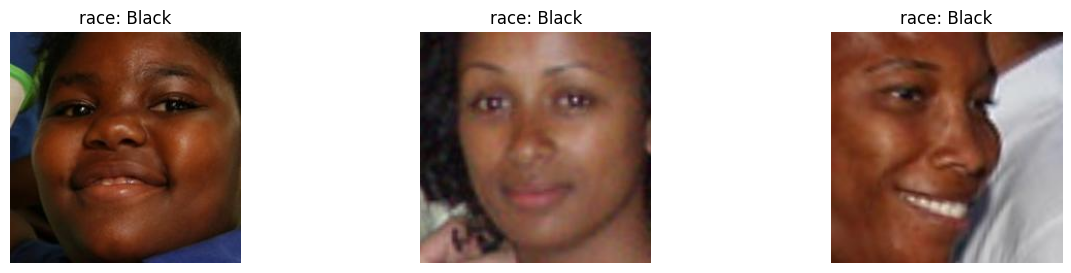

Trying to read: ../data/fairface/train/36766.jpg
Trying to read: ../data/fairface/train/58661.jpg
Trying to read: ../data/fairface/train/39555.jpg


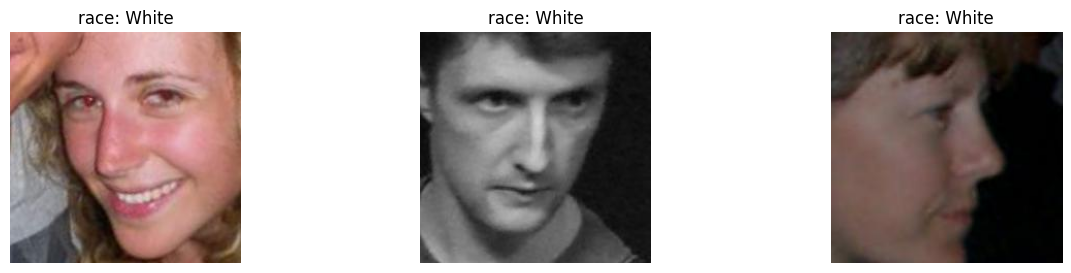

Trying to read: ../data/fairface/train/15721.jpg
Trying to read: ../data/fairface/train/417.jpg
Trying to read: ../data/fairface/train/3693.jpg


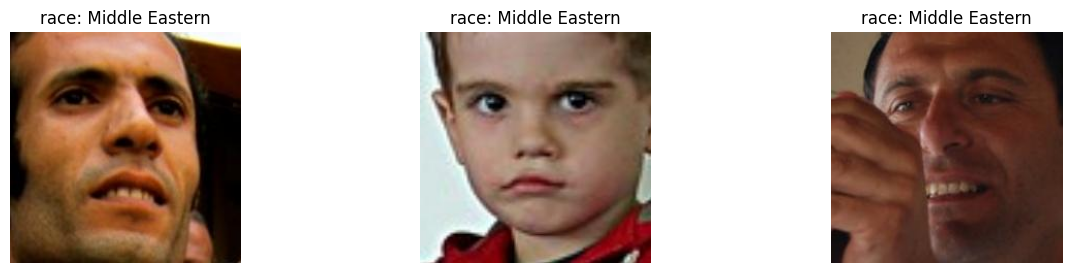

Trying to read: ../data/fairface/train/18121.jpg
Trying to read: ../data/fairface/train/85482.jpg
Trying to read: ../data/fairface/train/27785.jpg


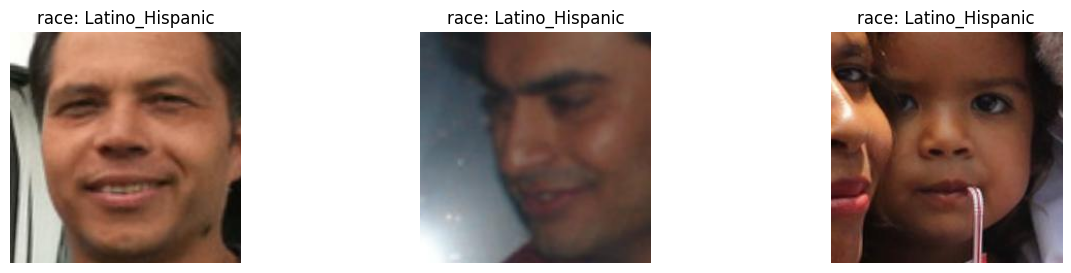

Trying to read: ../data/fairface/train/25333.jpg
Trying to read: ../data/fairface/train/51899.jpg
Trying to read: ../data/fairface/train/68932.jpg


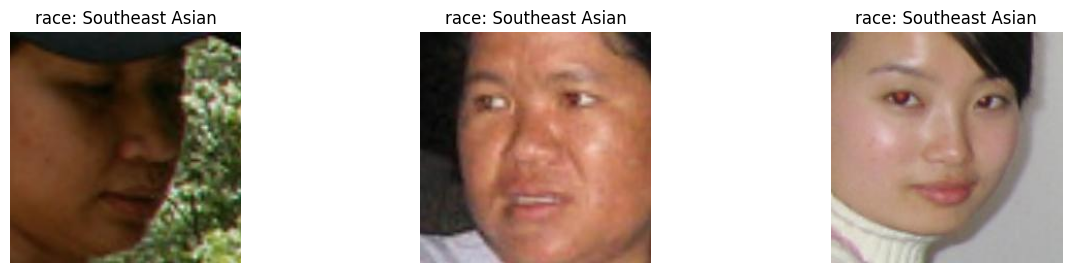

Trying to read: ../data/fairface/train/51702.jpg
Trying to read: ../data/fairface/train/28070.jpg
Trying to read: ../data/fairface/train/36423.jpg


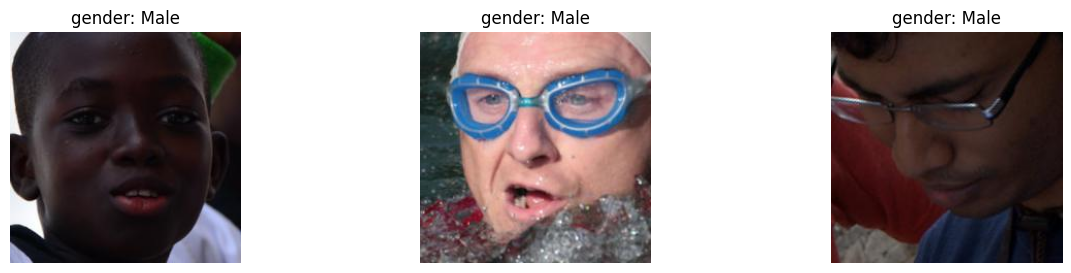

Trying to read: ../data/fairface/train/55917.jpg
Trying to read: ../data/fairface/train/66440.jpg
Trying to read: ../data/fairface/train/30936.jpg


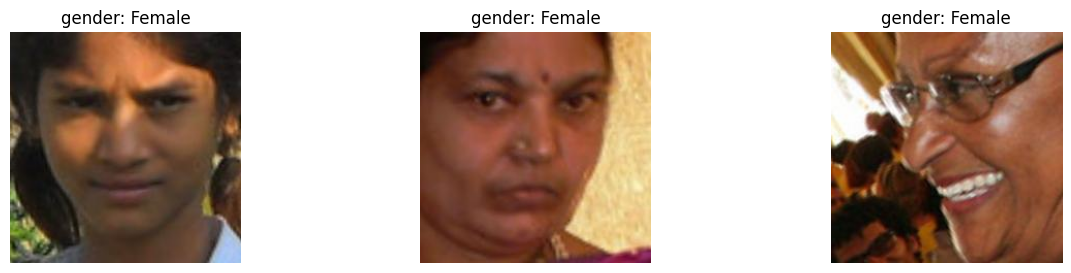

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Function to display images
def display_samples(df, label, label_value, num_samples=5):
    subset = df[df[label] == label_value].sample(n=num_samples)
    plt.figure(figsize=(15,3))
    for i, (_, row) in enumerate(subset.iterrows()):
        img_path = row['file']  # Adjust column name if necessary
        print(f"Trying to read: ../data/fairface/{img_path}")
        image = cv2.imread(f"../data/fairface/{img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"{label}: {label_value}")
    plt.show()

# Display samples for each race category
races = df['race'].unique()
for race in races:
    display_samples(df, 'race', race, num_samples=3)

# Display samples for each gender category
genders = df['gender'].unique()
for gender in genders:
    display_samples(df, 'gender', gender, num_samples=3)
